In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/LiShingHan/DataScience/main/DataSet/p7.7.csv')  # load data set
data

,price,area,room
0,229500,1850,4
1,273300,2190,5
2,247000,2100,4
3,195100,1930,3
4,261000,2300,4
5,179700,1710,2
6,168500,1550,2
7,234400,1920,4
8,168800,1840,2
9,180400,1720,2


In [3]:
X = data.iloc[:, [1,2]].values.reshape(-1, 2)  # 取第 0列   values converts it into a numpy array
Y = data.iloc[:, 0].values.reshape(-1, 1)  # 取第 1列   -1 means that calculate the dimension of rows, but have 1 column
X

array([[1850,    4],
       [2190,    5],
       [2100,    4],
       [1930,    3],
       [2300,    4],
       [1710,    2],
       [1550,    2],
       [1920,    4],
       [1840,    2],
       [1720,    2],
       [1660,    2],
       [2405,    5],
       [1525,    3],
       [2030,    2],
       [2240,    4]])

In [4]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # Train the model using the X sets

predictions = {}
predictions['intercept'] = linear_regressor.intercept_
predictions['coefficient'] = linear_regressor.coef_
predictions

{'intercept': array([12923.73073631]),
 'coefficient': array([[   65.60625952, 23613.13959984]])}

In [ ]:
# 繪圖
# https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [5]:
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(1500, 2500, 100)   # range of porosity values
y_pred = np.linspace(0, 5, 100)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

z

array([[229500],
       [273300],
       [247000],
       [195100],
       [261000],
       [179700],
       [168500],
       [234400],
       [168800],
       [180400],
       [156200],
       [288350],
       [186750],
       [202100],
       [256800]])

In [7]:
predicted = linear_regressor.predict(model_viz)
predicted

array([[111333.12000951],
       [111995.80949957],
       [112658.49898962],
       ...,
       [293679.69854406],
       [294342.38803412],
       [295005.07752417]])

In [8]:
x

array([1850, 2190, 2100, 1930, 2300, 1710, 1550, 1920, 1840, 1720, 1660,
       2405, 1525, 2030, 2240])

In [9]:
y

array([4, 5, 4, 3, 4, 2, 2, 4, 2, 2, 2, 5, 3, 2, 4])

In [10]:
z

array([[229500],
       [273300],
       [247000],
       [195100],
       [261000],
       [179700],
       [168500],
       [234400],
       [168800],
       [180400],
       [156200],
       [288350],
       [186750],
       [202100],
       [256800]])

In [11]:
# 把x，y，z组合成pandas.DataFrame
tmp = pd.DataFrame(x,columns=['X'])
tmp['Y'] = y
tmp['Z'] = z

# 直接使用 x, y, z 會報錯誤
#https://www.geek-share.com/detail/2792499427.html

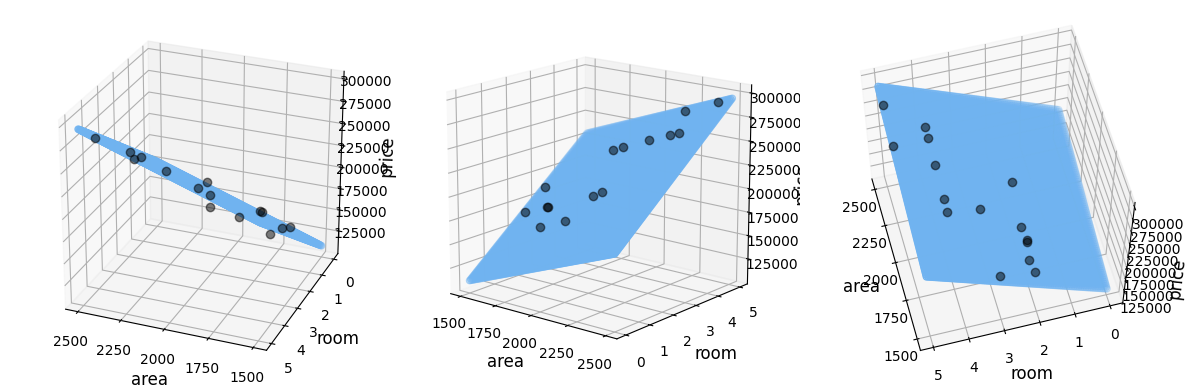

In [12]:

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(tmp['X'], tmp['Y'], tmp['Z'], color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('area', fontsize=12)
    ax.set_ylabel('room', fontsize=12)
    ax.set_zlabel('price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)


fig.tight_layout()